# Knn 알고리즘을 사용하여 남성인지 여성인지 분류합니다

## 데이터준비

In [36]:
import pandas as pd

filepath = './dataset/weight-height.csv'
total_df = pd.read_csv(filepath)
sex_full = total_df.to_numpy()
print(total_df)

      Gender     Height      Weight
0       Male  73.847017  241.893563
1       Male  68.781904  162.310473
2       Male  74.110105  212.740856
3       Male  71.730978  220.042470
4       Male  69.881796  206.349801
...      ...        ...         ...
9995  Female  66.172652  136.777454
9996  Female  67.067155  170.867906
9997  Female  63.867992  128.475319
9998  Female  69.034243  163.852461
9999  Female  61.944246  113.649103

[10000 rows x 3 columns]


In [37]:
maleHeight = total_df['Height']
maleHeight = maleHeight[:5000]

print(maleHeight)


0       73.847017
1       68.781904
2       74.110105
3       71.730978
4       69.881796
          ...    
4995    68.860062
4996    68.973423
4997    67.013795
4998    71.557718
4999    70.351880
Name: Height, Length: 5000, dtype: float64


In [38]:
femaleHeight = total_df['Height']
femaleHeight = femaleHeight[5000:10000]
print(femaleHeight)

5000    58.910732
5001    65.230013
5002    63.369004
5003    64.479997
5004    61.793096
          ...    
9995    66.172652
9996    67.067155
9997    63.867992
9998    69.034243
9999    61.944246
Name: Height, Length: 5000, dtype: float64


In [39]:
maleWeight = total_df['Weight']
maleWeight = maleWeight[:5000]
print(maleWeight)

0       241.893563
1       162.310473
2       212.740856
3       220.042470
4       206.349801
           ...    
4995    177.131052
4996    159.285228
4997    199.195400
4998    185.905909
4999    198.903012
Name: Weight, Length: 5000, dtype: float64


In [40]:
femaleWeight = total_df['Weight']
femaleWeight = femaleWeight[5000:10000]
print(femaleWeight)

5000    102.088326
5001    141.305823
5002    131.041403
5003    128.171511
5004    129.781407
           ...    
9995    136.777454
9996    170.867906
9997    128.475319
9998    163.852461
9999    113.649103
Name: Weight, Length: 5000, dtype: float64


In [41]:
maleWeightlist = []
maleHeightlist = []
femaleWeightlist = []
femaleHeightlist = []
for maleWeightlistindex in maleWeight:
    maleWeightlist.append(maleWeightlistindex)
for maleHeightlistindex in maleHeight:
    maleHeightlist.append(maleHeightlistindex)
for femaleHeightlistindex in femaleHeight:
    femaleHeightlist.append(femaleHeightlistindex)
for femaleWeightlistindex in femaleWeight:
    femaleWeightlist.append(femaleWeightlistindex)

In [42]:
print(maleWeightlist)
print(maleHeightlist)
print(femaleWeightlist)
print(femaleHeightlist)

[241.893563180437, 162.3104725213, 212.7408555565, 220.042470303077, 206.349800623871, 152.212155757083, 183.927888604031, 167.971110489509, 175.92944039571, 156.399676387112, 186.604925560358, 213.741169489411, 167.127461073476, 189.446181386738, 186.434168021239, 172.186930058117, 196.028506330482, 172.88347020878, 185.98395757313, 182.426648013226, 174.115929081393, 197.73142161472, 149.173566007975, 228.761780615196, 162.006651848287, 192.343976579187, 184.435174408406, 206.828189420354, 175.213922399227, 154.342638925955, 187.506843155807, 212.910225325521, 195.032243233835, 205.183621341371, 204.164125484101, 192.903515074649, 197.488242598925, 183.810973232751, 163.851824878622, 163.108017147583, 172.135597406825, 194.045404898059, 168.617746204292, 161.193432596622, 164.660277264007, 188.922303151274, 187.060552163801, 209.070863390252, 192.014335412005, 211.34249681964, 165.61162618225, 201.071918099568, 173.423960346601, 181.407679285937, 169.737707400252, 163.309528309674, 1

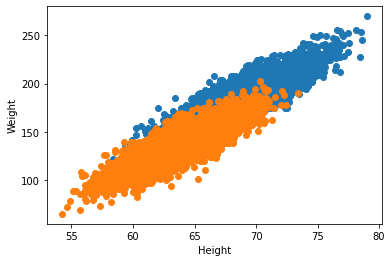

In [45]:
import matplotlib.pyplot as plt

plt.scatter(maleHeightlist, maleWeightlist)
plt.scatter(femaleHeightlist, femaleWeightlist)
plt.xlabel('Height')
plt.ylabel('Weight')
plt.show()



In [43]:
height = maleHeightlist + femaleHeightlist
weight = maleWeightlist + femaleWeightlist
persondata = [[h, w] for h, w in zip(height, weight)]
print(persondata)

[[73.847017017515, 241.893563180437], [68.7819040458903, 162.3104725213], [74.1101053917849, 212.7408555565], [71.7309784033377, 220.042470303077], [69.8817958611153, 206.349800623871], [67.2530156878065, 152.212155757083], [68.7850812516616, 183.927888604031], [68.3485155115879, 167.971110489509], [67.018949662883, 175.92944039571], [63.4564939783664, 156.399676387112], [71.1953822829745, 186.604925560358], [71.6408051192206, 213.741169489411], [64.7663291334055, 167.127461073476], [69.2830700967204, 189.446181386738], [69.2437322298112, 186.434168021239], [67.6456197004212, 172.186930058117], [72.4183166259878, 196.028506330482], [63.974325721061, 172.88347020878], [69.6400598997523, 185.98395757313], [67.9360048540095, 182.426648013226], [67.9150501938206, 174.115929081393], [69.4394398680395, 197.73142161472], [66.1491319608781, 149.173566007975], [75.2059736142212, 228.761780615196], [67.8931963386043, 162.006651848287], [68.1440327982008, 192.343976579187], [69.0896314289256, 184